In [131]:
import pylab as pl
import pandas as pd
import numpy as np

%pylab inline

import os

import json
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


#IDEA
## Standard subscribers are likely to be commuter on the morning peak.

##Non-Subscribers (Customers) are less likely than subscribers to choose biking for commuting

#NULL HYPOTHESIS
##For commercial hour, the ratio of average hourly trips by subscribers during peak hours to that of subscribers during off-peaak hours is same or lower than the same for non-subscribers (customers).

###Peak Hours: 8AM-10AM AND 5PM-8PM
###Off-Peak Hours: 6AM-8AM and 10AM-5PM
###Commercial Hours: 6AM-8PM


#ALTERNATIVE HYPOTHESIS
##For commercial hour, the ratio of average hourly trips by subscribers during peak hours to that of subscribers during off-peaak hours is significaantly higher than the same for non-subscribers..

#significant level 0.05

### Reading data from citibike csv file from April 2015

We want to use the start hour of each trip. This is not a perfect assumption (e.g. people who want to bike to his/her office may start their trip before 8AM), but for this study, we only use the start hour in order to simplify our approach.


In [30]:
#Read the csv file
df=pd.read_csv('201504-citibike-tripdata.csv')


In [133]:
df['date'] = pd.to_datetime(df['starttime'])

#Since the peak hours and off-peak hours are not continuous
#we create seperate dataframes for peak hours/off-peak hours
df_peak = df[((df['date'].dt.hour >= 8) & (df['date'].dt.hour < 10)) | (df['date'].dt.hour >= 17) & (df['date'].dt.hour < 20)]
df_op = df[((df['date'].dt.hour >= 6) & (df['date'].dt.hour < 8)) | (df['date'].dt.hour >= 10) & (df['date'].dt.hour < 17)]

# First we plot the number of trips per hour on a 24-hour basis to take a look how the data looks like

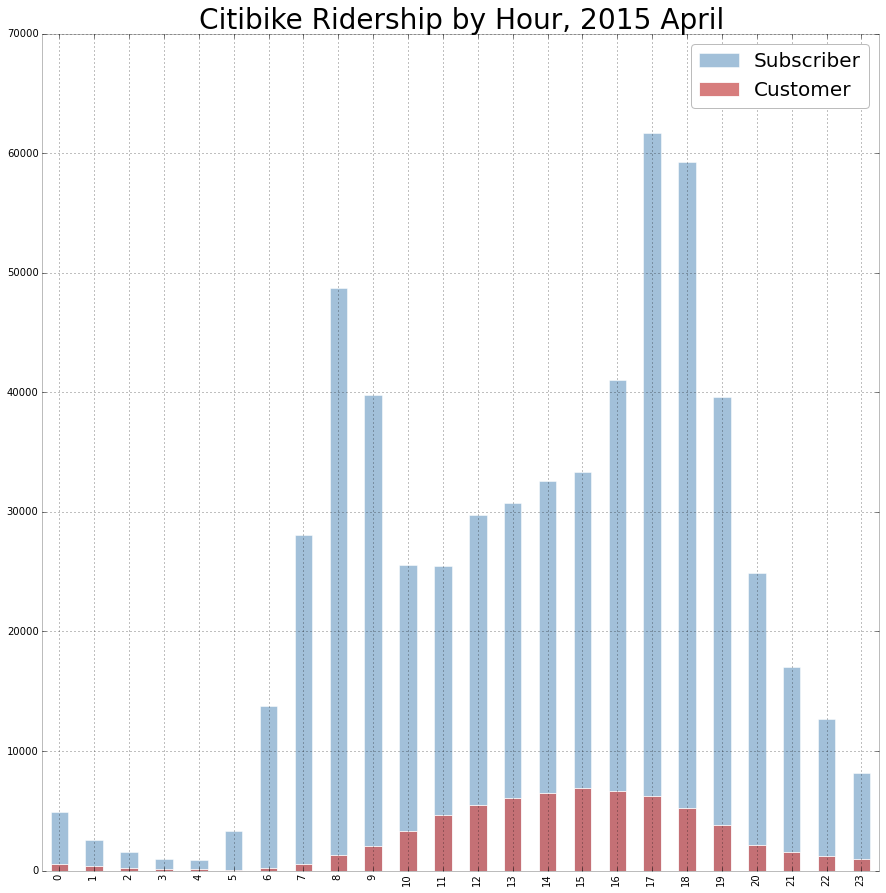

In [134]:
fig=pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_s = 1
ax=((df['date'][df['usertype']=='Subscriber'].groupby([df['date'].dt.hour]).count()/norm_s)).plot(kind="bar", alpha=0.5)


norm_c = 1
((df['date'][df['usertype']=='Customer'].groupby([df['date'].dt.hour]).count())/norm_c).plot(kind="bar", color='IndianRed', alpha=0.8)

pl.legend(['Subscriber','Customer'],fontsize=20)
pl.title('Citibike Ridership by Hour, 2015 April',fontsize=28)


###We can see different trends for subscribers and customers. For subscribers,  looks like they have more trips during peak hours and for customers, they tend to bike during midday.

###Let's seperate peak hours trips and off-peak hour trips to take a closer look

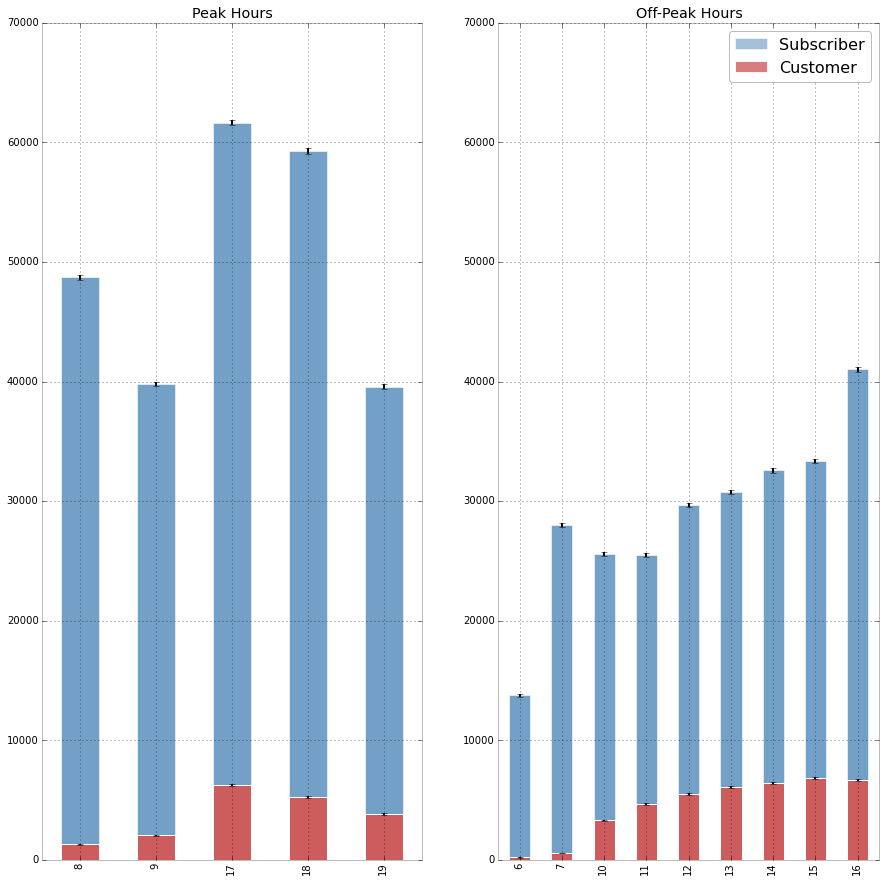

In [138]:
fig=pl.figure(figsize(15,15))
fig, axs = plt.subplots(1,2)

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_s = 1
ax1=((df_peak['date'][df_peak['usertype']=='Subscriber'].groupby([df_peak['date'].dt.hour]).count()/norm_s)).plot(kind="bar", alpha=0.5,ax=axs[0], title='Peak Hours')

norm_c = 1
((df_peak['date'][df_peak['usertype']=='Customer'].groupby([df_peak['date'].dt.hour]).count())/norm_c).plot(kind="bar", color='IndianRed', alpha=0.8,ax=axs[0])


ax2=((df_op['date'][df_op['usertype']=='Subscriber'].groupby([df_op['date'].dt.hour]).count()/norm_s)).plot(kind="bar", alpha=0.5,ax=axs[1],title='Off-Peak Hours')

((df_op['date'][df_op['usertype']=='Customer'].groupby([df_op['date'].dt.hour]).count())/norm_c).plot(kind="bar", color='IndianRed', alpha=0.8,ax=axs[1])

ax1.set_ylim(0, 70000)
ax2.set_ylim(0, 70000)


#add error bar for peak hours
#for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic
counts_s_peak=df_peak.date[df_peak.usertype=='Subscriber'].groupby([df_peak.date.dt.hour]).count()
norm_s = 1
error_s_peak=np.sqrt(counts_s_peak)
((counts_s_peak)/norm_s).plot(kind="bar", alpha=0.5, ax=axs[0], yerr=[((error_s_peak)/norm_s,(error_s_peak)/norm_s)], label='Subscriber')

counts_c_peak= df_peak.date[df_peak.usertype=='Customer'].groupby([df_peak.date.dt.hour]).count()
norm_c = 1
error_c_peak=np.sqrt(counts_c_peak)
ax=((counts_c_peak)/norm_c).plot(kind="bar",color='IndianRed', ax=axs[0], yerr=[
            ((error_c_peak)/norm_c,(error_c_peak)/norm_c)], label='Customer')

#add error bar for off-peak hours
counts_s_op=df_op.date[df_op.usertype=='Subscriber'].groupby([df_op.date.dt.hour]).count()
norm_s = 1
error_s_op=np.sqrt(counts_s_op)
((counts_s_op)/norm_s).plot(kind="bar", alpha=0.5, ax=axs[1], yerr=[((error_s_op)/norm_s,(error_s_op)/norm_s)], label='Subscriber')

counts_c_op= df_op.date[df_op.usertype=='Customer'].groupby([df_op.date.dt.hour]).count()
norm_c = 1
error_c_op=np.sqrt(counts_c_op)
ax=((counts_c_op)/norm_c).plot(kind="bar",color='IndianRed', ax=axs[1], yerr=[
            ((error_c_op)/norm_c,(error_c_op)/norm_c)], label='Customer')


pl.legend(['Subscriber','Customer'],fontsize=16)


###These are absolute numbers. it is very hard to compare absolute numbers. Ratios are more ameable to comparison, so we want to normalize the distribution (and the error bar as well)


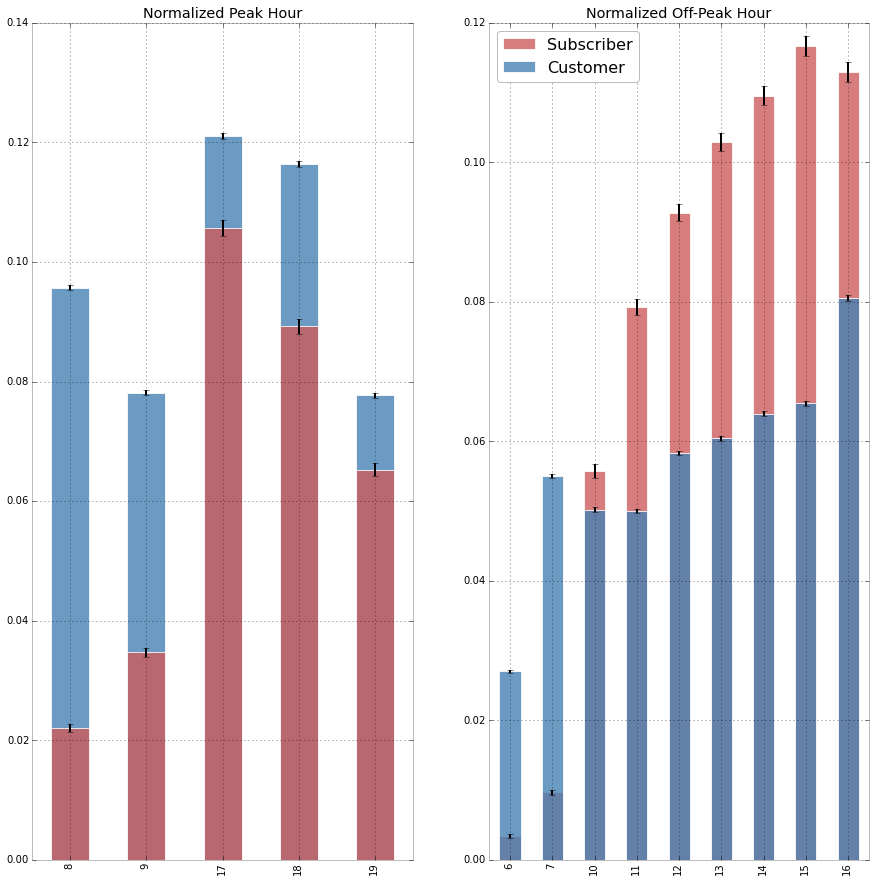

In [142]:
fig=pl.figure(figsize(15,15))
fig, axs = plt.subplots(1,2)

#normalize peak hours counts
norm_s=counts_s_peak.sum()+counts_s_op.sum()
ax=((counts_s_peak)/norm_s).plot(kind="bar", alpha=0.8, ax=axs[0], title='Normalized Peak Hour',yerr=[((error_s_peak)/norm_s,(error_s_peak)/norm_s)], label='Subscriber')

norm_c= counts_c_peak.sum()+counts_c_op.sum()
error_c_peak=np.sqrt(counts_c_peak)
((counts_c_peak)/norm_c).plot(kind="bar",color='IndianRed', alpha=0.8, ax=axs[0], yerr=[
            ((error_c_peak)/norm_c,(error_c_peak)/norm_c)], label='Customer')

#normalize off-peak hours counts
error_c_op=np.sqrt(counts_c_op)
((counts_c_op)/norm_c).plot(kind="bar",color='IndianRed', alpha=0.8, ax=axs[1], yerr=[
            ((error_c_op)/norm_c,(error_c_op)/norm_c)], label='Customer')

ax=((counts_s_op)/norm_s).plot(kind="bar", alpha=0.8,  ax=axs[1], title='Normalized Off-Peak Hour', yerr=[((error_s_op)/norm_s,(error_s_op)/norm_s)], label='Subscriber')

pl.legend(['Subscriber','Customer'],fontsize=16,loc=2)


##Let's do a Z-test on this

zscore is 79.2229953668
Is the p value 0.00 smaller than the critical value 0.05? 
YES!


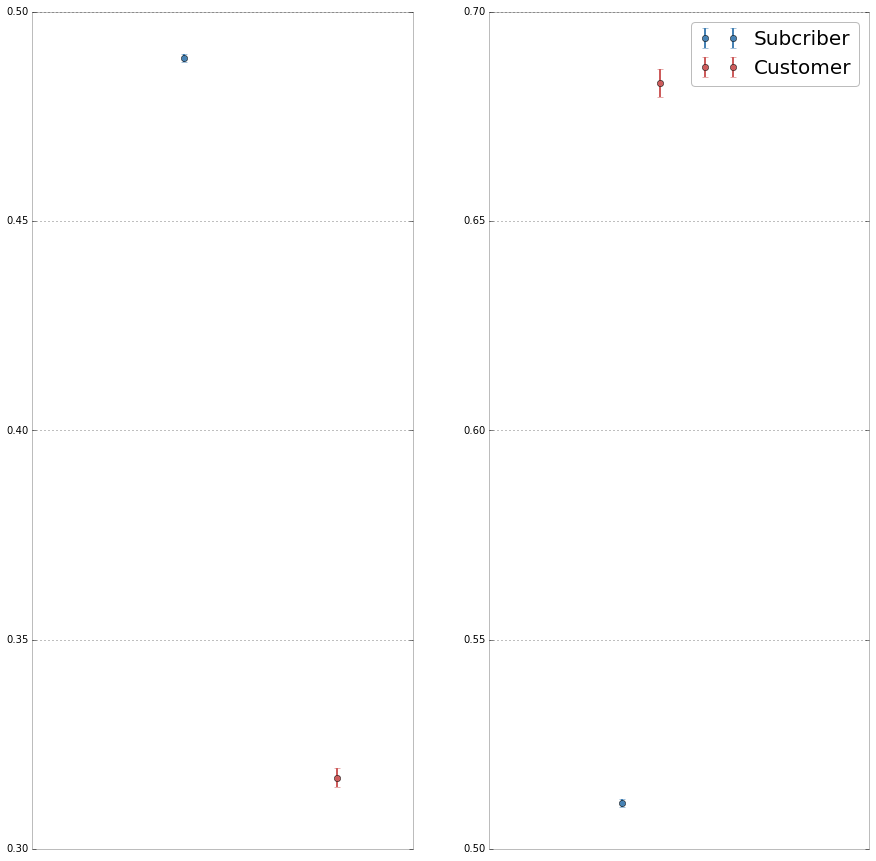

In [143]:
fig=pl.figure(figsize(15,15))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
peak_s = (counts_s_peak.sum())*1.0/norm_s
op_s = (counts_s_op.sum())*1.0/norm_s
epeak_s = np.sqrt(sum(error_s_peak**2))/norm_s
eop_s = np.sqrt(sum(error_s_op**2))/norm_s

peak_c = (counts_c_peak.sum())*1.0/norm_c
op_c = (counts_c_op.sum())*1.0/norm_c
epeak_c = np.sqrt(sum(error_c_peak**2))/norm_c
eop_c = np.sqrt(sum(error_c_op**2))/norm_c

#print peak_s,op_s,epeak_s,eop_s
#print peak_c,op_c,epeak_c,eop_c

ax1.errorbar([0.2],[peak_s], yerr=[epeak_s], fmt='o', label='Subscriber')
ax1.errorbar([0.4],[peak_c], yerr=[epeak_c], fmt='o', label='Customer')
ax1.set_xlim(0,0.5)
ax2.errorbar([0.2],[op_s], yerr=[eop_s], fmt='o', label='Subcriber')
ax2.errorbar([0.4],[op_c], yerr=[eop_c], fmt='o', label='Customer')
ax1.set_xlim(0,0.5)
pl.xlim(-0.5,1.5)
pl.legend(fontsize=20)

sp = (peak_s*norm_s + peak_c*norm_c)*1.0/ (norm_s + norm_c)
SE = np.sqrt(sp * ( 1. - sp ) * ( (1./norm_s) + (1./norm_c) ) )
z = (peak_s - peak_c ) / SE
#print peak_s, peak_c, sp,SE,z
print 'zscore is %s' %(z)

####p-value=1-p
##since the Zscore is pretty large, we use 0.9998 as a **conservative** approach. 
p=1-0.9998
alpha=0.05

def report_result(p,a):
    print 'Is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a)
    if p<a:
        print "YES!"
    else: print "NO!"
    
report_result(p,alpha)

###Is the percentage of subscribers that ride on off-hours lower or equal to that of non-subscribers (customers)?

In [121]:
P0opP1=op_c-op_s
print P0opP1

0.172031100582


###But is it statistically significant?

In [145]:
sp_stdev= lambda p0, n1: np.sqrt(p0*(1-p0)/n1)
sp_stdev_sc=sp_stdev(op_s,norm_c)

zscore = lambda p0, p1, s : (p0-p1)/s
z = zscore(op_c, op_s, sp_stdev_sc)
print "zcore is %s" % (z) 



zcore is 83.5642768208


### Since the largest number we see in the z stats table in assignment 1 is 2.9, which gives us a p value <0.0002, which is smaller then the chosen significant level $\alpha=0.05$ 
##So yes, it is statistically significant!
## The NULL hypothesis is rejected